# Продвинутая визуализация с Matplotlib

## Домашнее задание

### Цель домашнего задания

Отработать навык продвинутой визуализации и форматирования данных с помощью matplotlib. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

При построении графиков необходимо использовать объектно-ориентированный подход (задание графика через объекты Figure и Axes) везде, где это возможно. У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-6, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

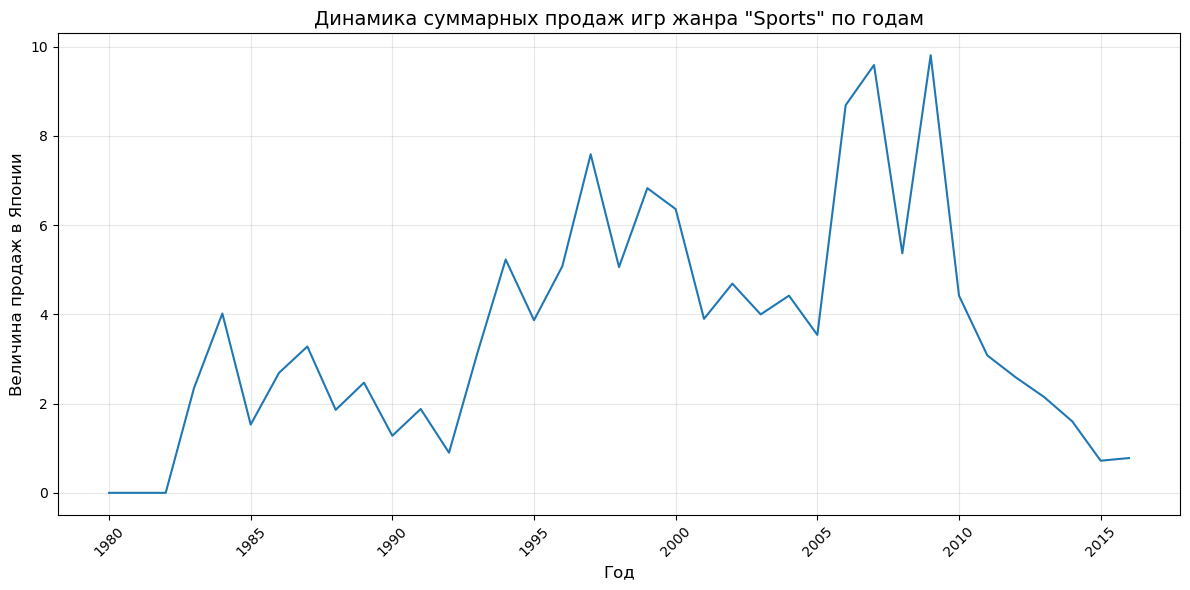

In [4]:
#строим серию с цепочкой: выборкой по жанру "Sports", группировкой по годам и сумме продаж в Японии,
#сортирировкой по годам (по возрастанию)
df_Sports = (df[df['Genre'] == 'Sports'].groupby('Year')['JP_Sales'].sum().sort_index())

#создание полотна для графика
plt.figure(figsize=(12, 6))
#нанесение значений серии на график
plt.plot(df_Sports)
#Настройка графика
plt.title('Динамика суммарных продаж игр жанра "Sports" по годам', fontsize=14)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Величина продаж в Японии', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

#показать график
plt.show()

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

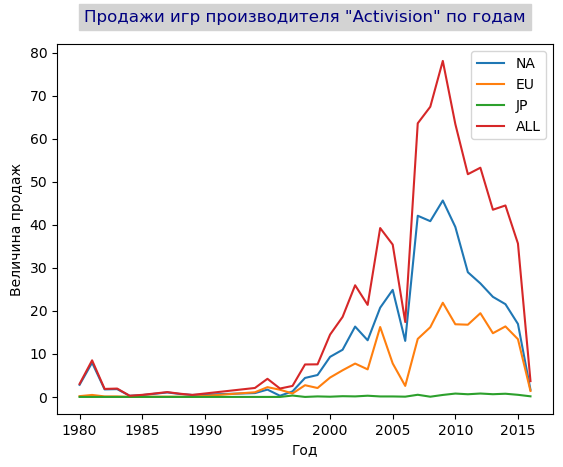

In [17]:
#строим серию с цепочкой: выборкой по производителю "Activision", группировкой по годам и сумме продаж в разных регионах,
#сортирировкой по годам (по возрастанию)
df_ActivisionNA = (df[df['Publisher'] == 'Activision'].groupby('Year')['NA_Sales'].sum().sort_index())
df_ActivisionEU = (df[df['Publisher'] == 'Activision'].groupby('Year')['EU_Sales'].sum().sort_index())
df_ActivisionJP = (df[df['Publisher'] == 'Activision'].groupby('Year')['JP_Sales'].sum().sort_index())
df_ActivisionALL = (df[df['Publisher'] == 'Activision'].groupby('Year')['Global_Sales'].sum().sort_index())
#создаем объекты для построения графика
fig, ax = plt.subplots()
#наносим значеиня каждой серии с помощтю метода plot объекта класса ax и добавляем Лейбл
ax.plot(df_ActivisionNA.index, df_ActivisionNA.values, label = 'NA')
ax.plot(df_ActivisionEU.index, df_ActivisionEU.values, label = 'EU')
ax.plot(df_ActivisionJP.index, df_ActivisionJP.values, label = 'JP')
ax.plot(df_ActivisionALL.index, df_ActivisionALL.values, label = 'ALL')
#добавляем методы объектов для подписи графиков
ax.set_title('Продажи игр производителя "Activision" по годам', pad = 16, color = 'navy', backgroundcolor = 'lightgray')
ax.set_xlabel('Год')
ax.set_ylabel('Величина продаж')
#переопределяем ось х
#ax.set_xticks(df_ActivisionALL.index[::5])
#выводим легенду
ax.legend()

plt.show()

In [9]:
df_ActivisionJP

Year
1980.0    0.00
1981.0    0.00
1982.0    0.00
1983.0    0.00
1984.0    0.00
1985.0    0.00
1987.0    0.00
1988.0    0.00
1989.0    0.00
1994.0    0.00
1995.0    0.00
1996.0    0.00
1997.0    0.32
1998.0    0.00
1999.0    0.12
2000.0    0.05
2001.0    0.17
2002.0    0.12
2003.0    0.28
2004.0    0.11
2005.0    0.11
2006.0    0.06
2007.0    0.50
2008.0    0.05
2009.0    0.46
2010.0    0.78
2011.0    0.62
2012.0    0.79
2013.0    0.63
2014.0    0.74
2015.0    0.49
2016.0    0.14
Name: JP_Sales, dtype: float64

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

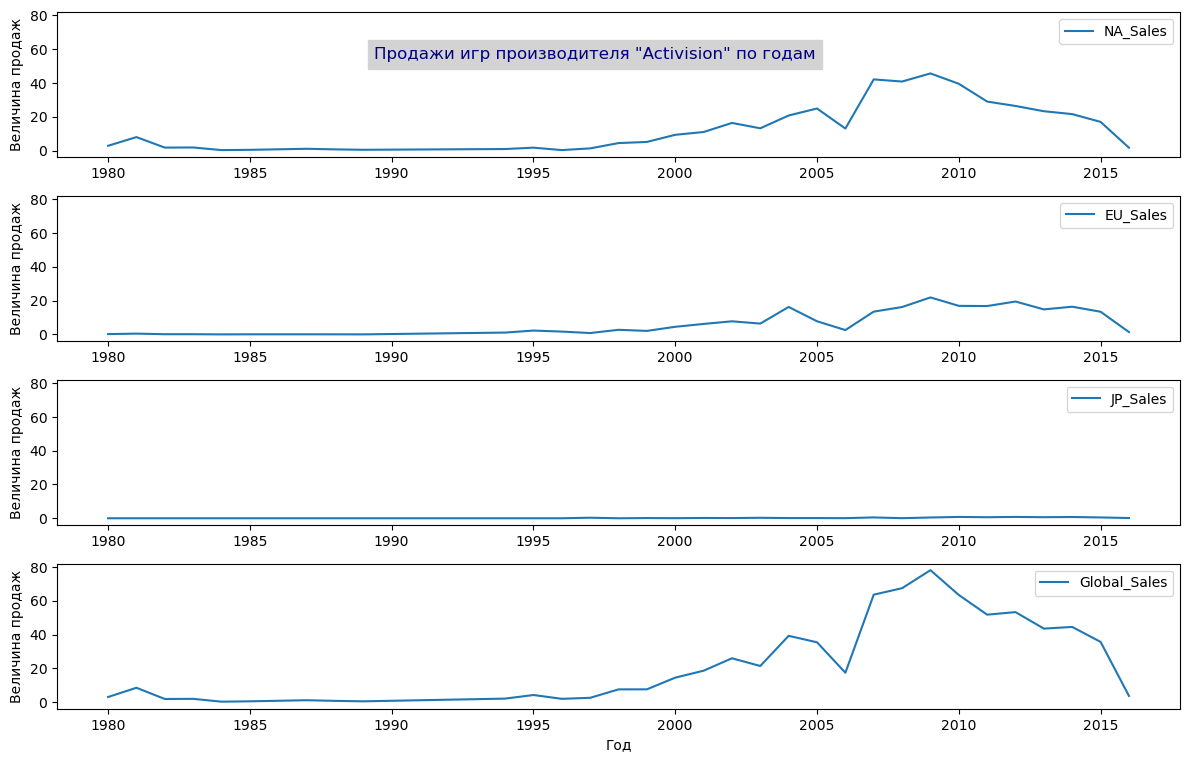

In [22]:

#создаем объекты для построения графика, задаем атрибуты
fig, axs = plt.subplots(nrows = 4, sharey = True, figsize=(12, 8))
list_series = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

#наносим значеиня каждой серии с помощтю метода plot объекта класса axs
for i, column in enumerate(list_series):
    #добавляем серию в цикл, перебираем по значениям листа list_series
    df_Activision = (df[df['Publisher'] == 'Activision'].groupby('Year')[column].sum().sort_index())    
    ax = axs[i]
    ax.plot(df_Activision.index, df_Activision.values, label=column)
    ax.legend()
    #добавляем методы объектов для подписи графиков
    if i == len(list_series) - 1:
        ax.set_xlabel('Год') #Только на последнем графике подпись оси X
    ax.set_ylabel('Величина продаж')
fig.suptitle('Продажи игр производителя "Activision" по годам', color='navy', backgroundcolor='lightgray', y=0.90)     
plt.tight_layout()
plt.show()


### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

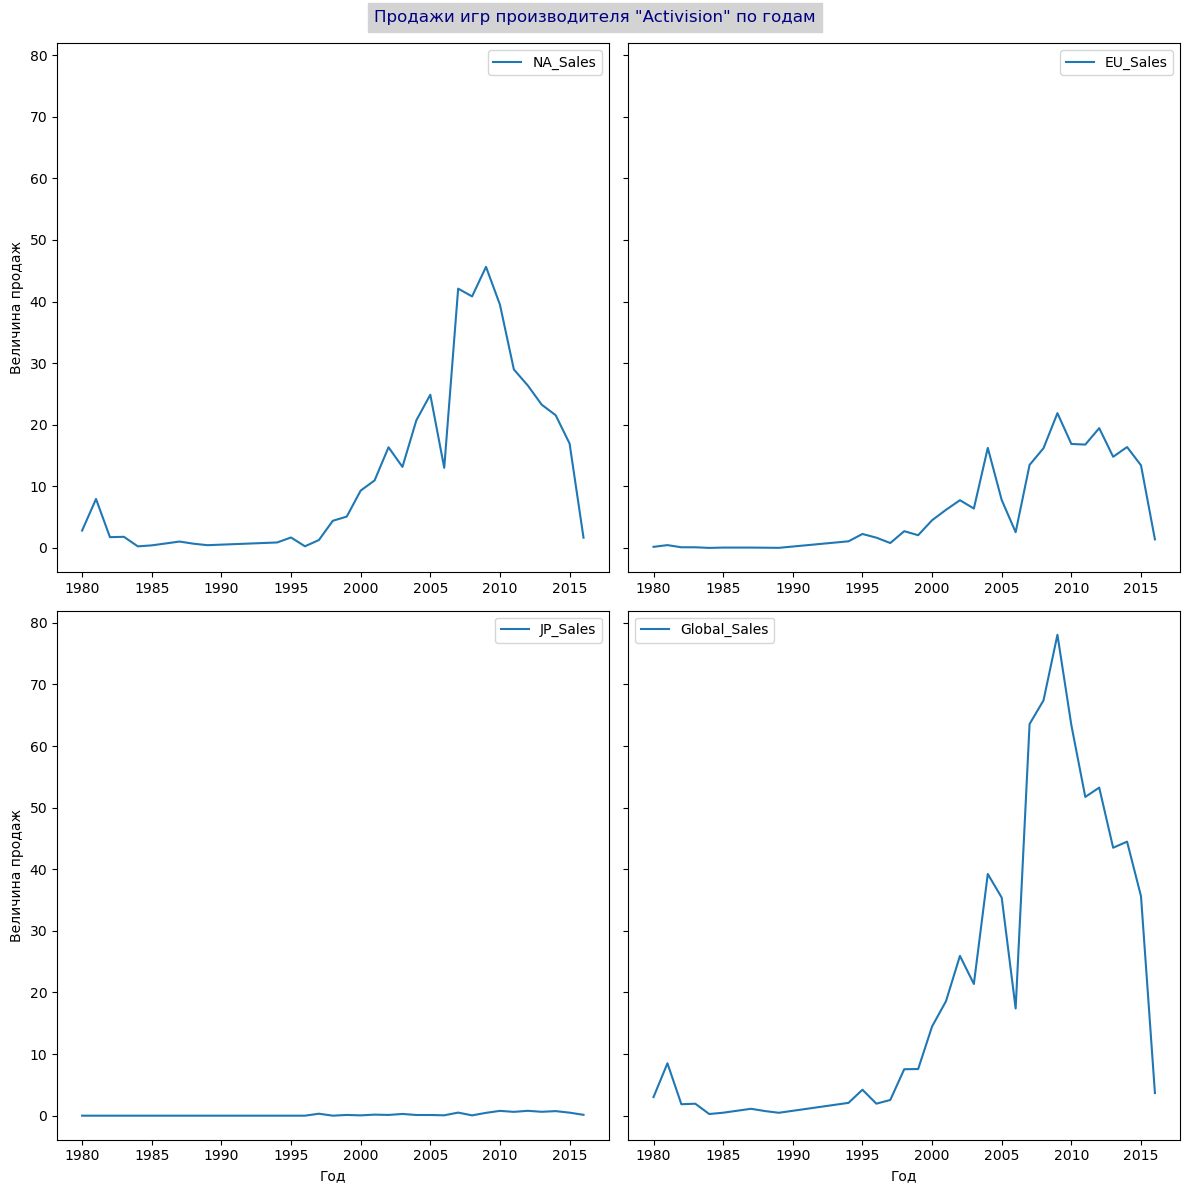

In [28]:

#создаем объекты для построения графика, задаем атрибуты
fig, axs = plt.subplots(ncols = 2, nrows = 2, sharey = True, figsize=(12, 12))
all_series = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
#наносим значеиня каждой серии с помощтю метода plot объекта класса axs
for i, column in enumerate(all_series):
    #определяем позицию на сетке 2x2
    row = i // 2  #0 или 1 для строки
    col = i % 2   #0 или 1 для столбца
    #добавляем серию в цикл, перебираем по значениям листа list_series1 и list_series2
    df_Activision = (df[df['Publisher'] == 'Activision'].groupby('Year')[column].sum().sort_index())    
    #определяем, куда наносить каждую серию
    ax = axs[row][col]
    #наносим с помощью метода plot значения серии и Лейбл
    ax.plot(df_Activision.index, df_Activision.values, label=column)
    ax.legend()
    #добавляем методы объектов для подписи графиков
    if row == 1:
        ax.set_xlabel('Год') 
    if col == 0:
        ax.set_ylabel('Величина продаж')
fig.suptitle('Продажи игр производителя "Activision" по годам', color='navy', backgroundcolor='lightgray', y=0.99)     
plt.tight_layout()
plt.show()


### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

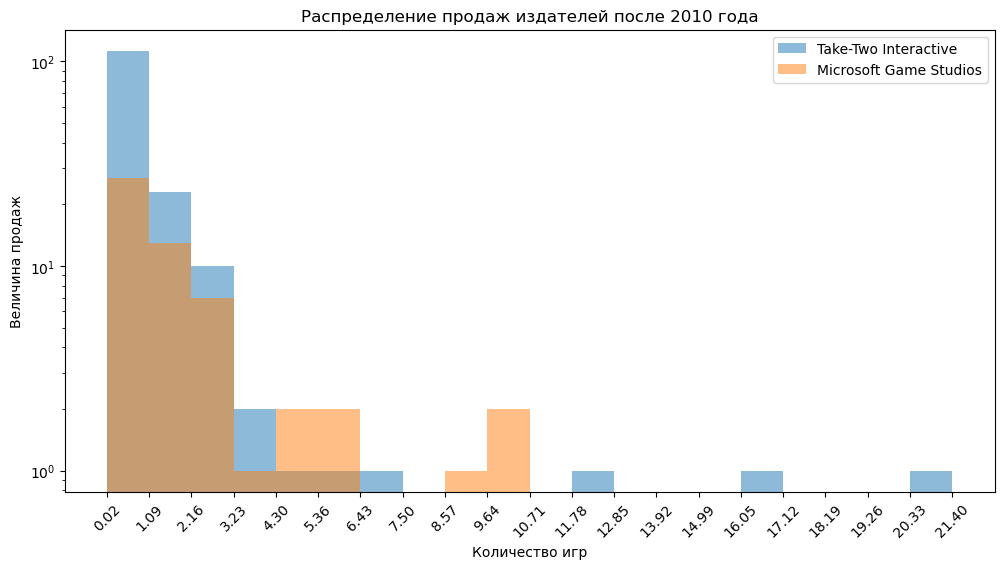

In [38]:
#фильтруем данные: после 2010 года, для двух производителей, берем только столбец с продажами для гистограммы
series5_1 = df[(df['Year'] >= 2010) & (df['Publisher'] == 'Microsoft Game Studios')]['Global_Sales']
series5_2 = df[(df['Year'] >= 2010) & (df['Publisher'] == 'Take-Two Interactive')]['Global_Sales']
#создаем экземпляры класса, на вход подаем полотно 12х6
fig, ax = plt.subplots(figsize=(12,6))
#в параметр bins передаем экземпляр класса с атрибутами серии, полупрозрачности, Лейбла, и количества столбцов
_, bins, _ = ax.hist(series5_2, label = 'Take-Two Interactive', alpha = 0.5, bins = 20, log=True) #передаем атрибут логарифмирования
#вызываем метод ax, передаем первую серию, первый Лейбл, прозрачность, количество столбцов, равное второй серии
ax.hist(series5_1, label = 'Microsoft Game Studios', alpha = 0.5, bins = bins, log=True) #передаем атрибут логарифмирования
#вызываем методы подписи графика
ax.set_title('Распределение продаж издателей после 2010 года')
ax.set_xlabel('Количество игр')
ax.set_ylabel('Величина продаж')
#в методе set_xticks переопределяем градацию оси х
ax.set_xticks(list(bins))
ax.tick_params(axis = 'x', rotation = 45)
ax.legend()

plt.show()


In [35]:
series5_1

15       21.82
62        9.88
65        9.76
72        9.20
139       6.24
140       6.24
192       5.13
228       4.64
260       4.26
439       3.15
467       3.00
632       2.44
643       2.41
658       2.38
669       2.36
748       2.18
830       2.04
843       2.02
970       1.78
1018      1.74
1121      1.64
1141      1.61
1208      1.54
1339      1.44
1416      1.37
1431      1.36
1442      1.35
1820      1.12
1836      1.11
2427      0.85
2489      0.83
2729      0.75
3374      0.60
3454      0.58
3927      0.51
4135      0.48
4513      0.43
4770      0.41
5015      0.38
5222      0.36
5419      0.34
5698      0.32
6041      0.29
7548      0.20
7975      0.19
8031      0.18
8233      0.17
8300      0.17
9183      0.14
10741     0.10
10814     0.10
12333     0.06
12360     0.06
13157     0.05
13312     0.05
14619     0.03
Name: Global_Sales, dtype: float64

### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

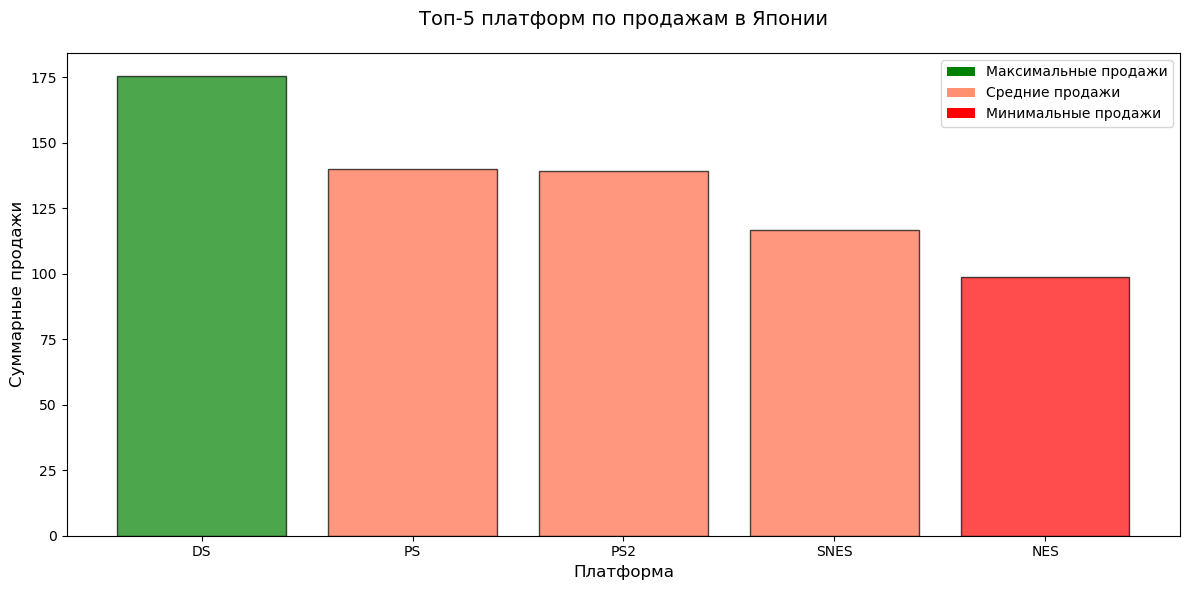

In [46]:
#строим серию с цепочкой: группировкой по платформе и сумме продаж в Японии,
#сортировкой по убыванию, обрезаем первые пять
df_Platform_JP = (df.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False).head(5))
#создаем экземпляры класса, на вход подаем полотно 12х6
fig, ax = plt.subplots(figsize=(12,6))
#cоздаем массив цветов: максимальный - зеленый, минимальный - красный, остальные - оранжевые
colors = []
for i, value in enumerate(df_Platform_JP.values):
    if i == 0:  #максимальный столбец
        colors.append('green')
    elif i == len(df_Platform_JP) - 1:  #минимальный столбец
        colors.append('red')
    else:  #остальные столбцы
        colors.append(f'#FF6A47')  #просто оранжевый цвет
#cтроим столбчатую диаграмму
bars = ax.bar(df_Platform_JP.index, df_Platform_JP.values, 
              label='Продажи в Японии', alpha=0.7, 
              color=colors, edgecolor='black')

#вызываем методы подписи графика
ax.set_title('Топ-5 платформ по продажам в Японии', fontsize=14, pad=20)
ax.set_xlabel('Платформа', fontsize=12)
ax.set_ylabel('Суммарные продажи', fontsize=12)

#добавляем легенду с пояснением цветов
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='Максимальные продажи'),
    Patch(facecolor='#FF9070', label='Средние продажи'),
    Patch(facecolor='red', label='Минимальные продажи')
]
ax.legend(handles=legend_elements)
plt.tight_layout()
plt.show()

## Дополнительные (необязательные) задачи


### Задача 7

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

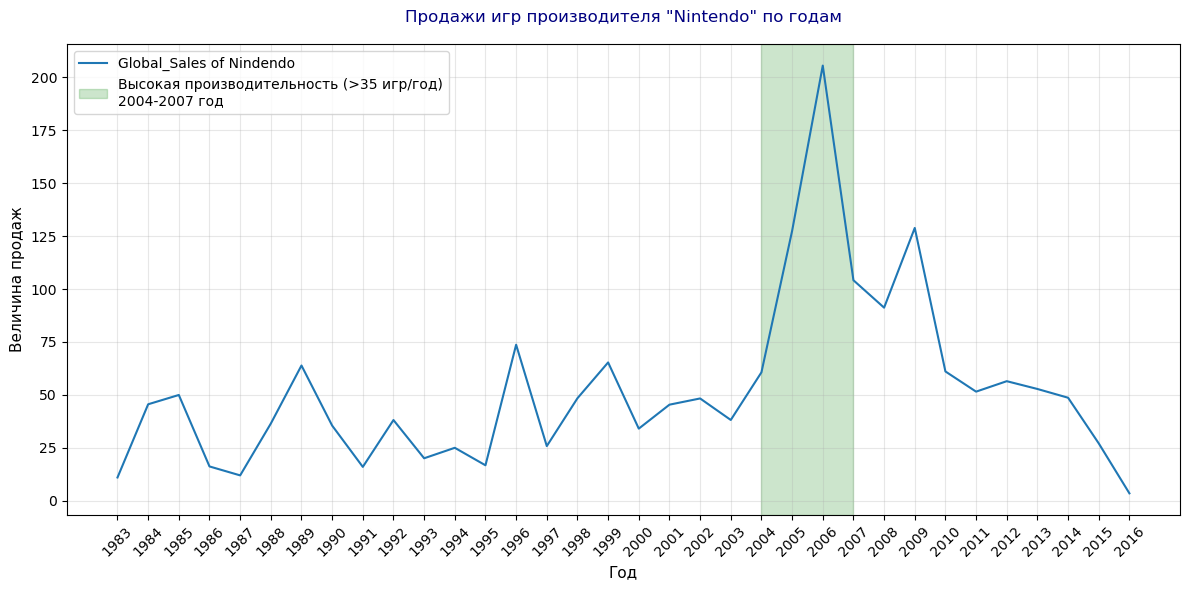

In [74]:
#группируем данные: Nintendo, глобальные продажи
grup_data = df[df['Publisher'] == 'Nintendo'].groupby('Year').size()
#задаем еще один фильтр, когда выпущено больше 35 игр
high_production_years = grup_data[grup_data > 35]
#определяем промежуток времени для полупрозрачного прямоугольника
if not high_production_years.empty:
    start_year = high_production_years.index.min()
    end_year = high_production_years.index.max()

#фильтруем данные: Nintendo, глобальные продажи, годы
filtered_data = df[df['Publisher'] == 'Nintendo'].groupby('Year')['Global_Sales'].sum()

#создаем объекты для построения графика
fig, ax = plt.subplots(figsize=(12, 6))
#наносим значеиня каждой серии с помощтю метода plot объекта класса ax и добавляем Лейбл
ax.plot(filtered_data.index, filtered_data.values, label = 'Global_Sales of Nindendo')

#добавляем методы объектов для подписи графиков
ax.set_title('Продажи игр производителя "Nintendo" по годам', pad = 16, color = 'navy', fontsize=12)
ax.set_xlabel('Год', fontsize=11)
ax.set_ylabel('Величина продаж', fontsize=11)

#подсвечиваем промежуток высокой производительности
if not high_production_years.empty:
    ax.axvspan(start_year, end_year, alpha=0.2, color='green', label=f'Высокая производительность (>35 игр/год)\n{int(start_year)}-{int(end_year)} год')

#настраиваем ось X
ax.set_xticks(range(int(filtered_data.index.min()), int(filtered_data.index.max()) + 1, 1))
ax.tick_params(axis='x', rotation=45)

#добавляем сетку и легенду
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()













In [57]:

high_production_years

Year
2004.0    57
2005.0    45
2006.0    53
2007.0    42
dtype: int64

### Задача 8

Определите 3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель). Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны

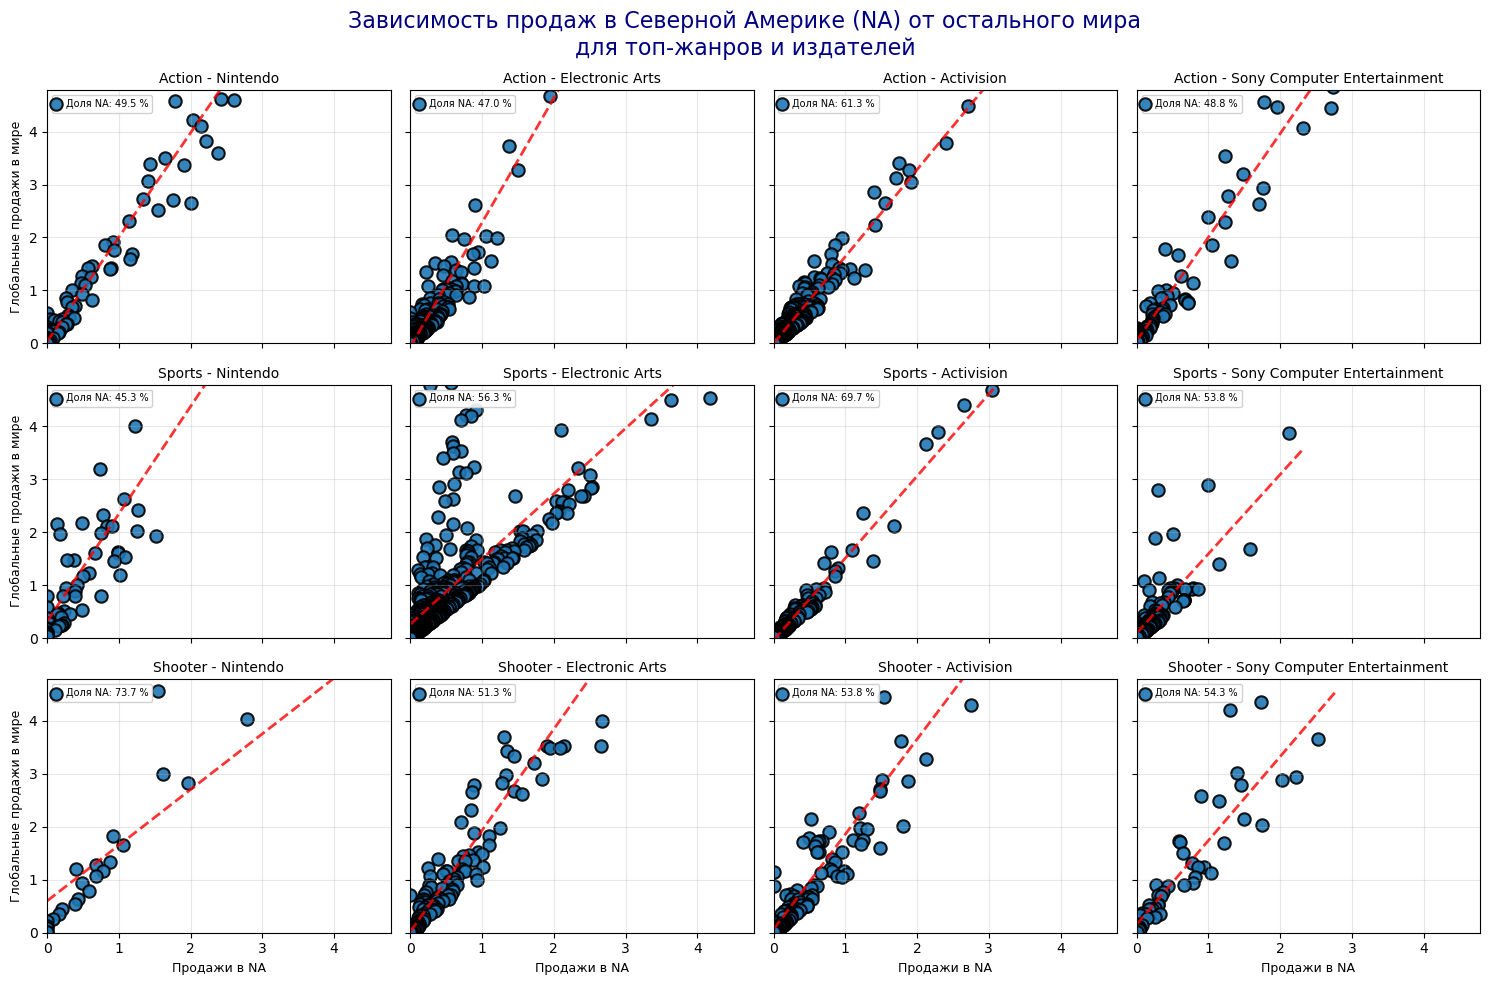

In [146]:
#Находим топ 3 игр по жанру
top_genres = df.groupby('Genre')['Global_Sales'].sum().nlargest(3)
#Находим топ 4 игр по издателю
top_Publisher = df.groupby('Publisher')['Global_Sales'].sum().nlargest(4)

#добавляем найденные значения в списки
list_genres = list(top_genres.index)
list_Publisher = list(top_Publisher.index)

#создаем объекты для построения графика
fig, axs = plt.subplots(figsize = (15,10), ncols = 4, nrows = 3, sharey = True, sharex = True)
#придумываем наименование экземпляру fig
fig.suptitle('Зависимость продаж в Северной Америке (NA) от остального мира\nдля топ-жанров и издателей', 
             fontsize=16, color='navy', y=0.98)

#создаем каждую серию циклом и наносим значеиня каждой серии + серии 'Global_Sales'

for i, column in enumerate(list_genres):
    for j, row in enumerate(list_Publisher):
        #фильтруем данные для конкретного жанра и издателя
        filtered_data = df[(df['Genre'] == column) & (df['Publisher'] == row)]
        #определяем текущие оси
        ax = axs[i][j]
        
        #строим точечный график зависимости продаж в NA и обземировых продаж
        scatter = ax.scatter(filtered_data['NA_Sales'], filtered_data['Global_Sales'], alpha=0.9, s=80, edgecolors='black', linewidth=1.5)
        #Добавляем линию регрессии для отображения зависимостей
        if len(filtered_data) > 1:
            #вычисляем коэффициенты линейной регрессии
            z = np.polyfit(filtered_data['NA_Sales'], filtered_data['Global_Sales'], 1)
            p = np.poly1d(z)
            
            #строим линию регрессии
            x_range = np.linspace(0, filtered_data['NA_Sales'].max() * 1.1, 100)
            ax.plot(x_range, p(x_range), "r--", alpha=0.8, linewidth=2)
         
        #настройка подписей
        ax.set_title(f'{column} - {row}', fontsize=10, pad=5)
        if i == 2:  #последняя строка
            ax.set_xlabel('Продажи в NA', fontsize=9)
        if j == 0:  #первый столбец
            ax.set_ylabel('Глобальные продажи в мире', fontsize=9)            
        
        #добавляем сетку
        ax.grid(True, alpha=0.3)
        
        #вычисляем долю NA продаж для легенды
        na_share = (filtered_data['NA_Sales'].sum() / filtered_data['Global_Sales'].sum()) * 100
        #создаем легенду с информацией о доле продаж в NA
        legend_text = f'Доля NA: {na_share:.1f} %'
             
        #добавляем легенду
        ax.legend([legend_text], loc='upper left', fontsize=7, handlelength=0, handletextpad=1, frameon=True, fancybox=True, framealpha=0.9)
        
        #устанавливаем одинаковые пределы для осей X и Y
        max_val = max(filtered_data['NA_Sales'].max(), filtered_data['Global_Sales'].max())
        ax.set_xlim(0, max_val * 1.1)
        ax.set_ylim(0, max_val * 1.1)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


In [92]:
list_Publisher

['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment']